<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints, then create the necessary analysis and code for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario:  Predicting whether somebody donated blood in a given month
Blood donations are important in the medical field for a range of reasons, such as assisting patients undergoing surgery, improving the quality of a patient's bloodstream,
managing serious injury/illness or even medical research.

There is a dataset that collects information about how many times a donor donated blood, how much they donated and when they last donated.

Data is courtesy of **Yeh, I-Cheng** via the **UCI Machine Learning** repository:
- Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008, doi:10.1016/j.eswa.2008.07.018.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
Is someone likely to donate blood?


# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/about) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [48]:
# Find the dataset described above
# Hint: search for it through the UCI Machine Learning Repository

# Step 3: Read the Data
- Read the data (transfusion.data)
- Perform some basic structural cleaning to facilitate the work

In [51]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

In [53]:
data = pd.read_csv(r'/Users/annaxu/Documents/Data Science/DATA/transfusion.data')
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [55]:
data.columns = ['recency', 'frequency', 'monetary', 'time', 'donated']

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent the absence of data)

In [58]:
#As per lab 7.1.1

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Feature Engineer** (if useful or necessary)

In [61]:
#As per lab 7.1.1

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)? Recency, frequency, monetary, time
- Is there an output variable (label)? Donated
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [X] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [X] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [65]:
# Create training and testing subsets
X = data.drop(columns = 'donated')
y = data['donated']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [68]:
#Find optimal hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 7, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4, 6],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=1),
    param_grid,
    cv=5,
    scoring='f1', #f1 is better for binary classification with imbalanced classes
    n_jobs=-1, #use all processors to run jobs in parallel
    error_score='raise'  # helps debug
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'class_weight': 'balanced', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


# Step 9: Fit the Model

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [71]:
#Get y_train predictions and probabilities
y_train_pred = grid_search.predict(X_train)
y_train_probs = grid_search.predict_proba(X_train)[:,1]

#Change threshold to increase precision
y_train_pred_adj = (y_train_probs >= 0.6).astype(int)

#Print accuracy score
print('Accuracy score: {:.4}'.format(accuracy_score(y_train, y_train_pred_adj)))
print() 

#Print confusion matrix
array = metrics.confusion_matrix(y_train, y_train_pred_adj)
confusion_matrix = pd.DataFrame(array, columns = ['predicted_no_donate', 'predicted_donate'], index = ['does_not_donate', 'does_donate'])
print(confusion_matrix)
print()

#Print classification report
print(classification_report(y_train, y_train_pred_adj))

Accuracy score: 0.8271

                 predicted_no_donate  predicted_donate
does_not_donate                  394                34
does_donate                       63                70

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       428
           1       0.67      0.53      0.59       133

    accuracy                           0.83       561
   macro avg       0.77      0.72      0.74       561
weighted avg       0.82      0.83      0.82       561



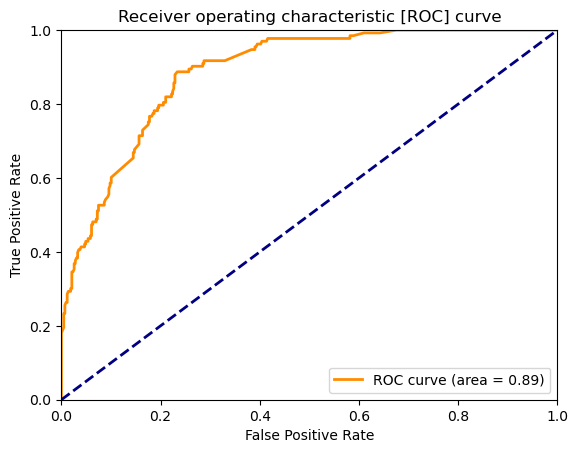

In [72]:
#Get fpr and tpr
fpr, tpr, _ = metrics.roc_curve(y_train, y_train_probs)

#Calculate area under the curve
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic [ROC] curve')
plt.legend(loc = "lower right")
plt.show()

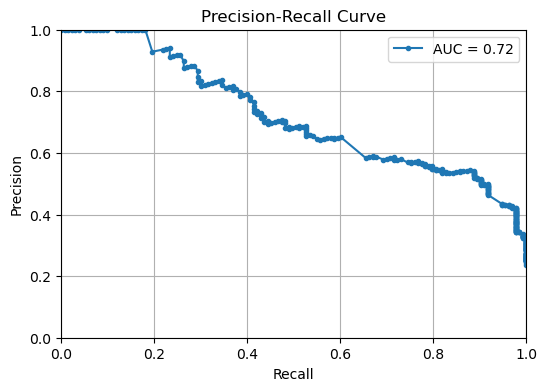

In [73]:
#Get precision and recall
precision, recall, thresholds = precision_recall_curve(y_train, y_train_probs)

#Get the area under the curve
auc_score = auc(recall, precision)

#Plot the precision-recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.', label=f'AUC = {auc_score:.2f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [75]:
# Evaluate model against test set

#Get y_test predictions and probabilities
y_test_pred = grid_search.predict(X_test)
y_test_probs = grid_search.predict_proba(X_test)[:,1]

#Change threshold to increase precision
y_test_pred_adj = (y_test_probs >= 0.6).astype(int)

#Print accuracy score
print('Accuracy score: {:.4}'.format(accuracy_score(y_test, y_test_pred_adj)))
print() 

#Print confusion matrix
array = metrics.confusion_matrix(y_test, y_test_pred_adj)
confusion_matrix = pd.DataFrame(array, columns = ['predicted_no_donate', 'predicted_donate'], index = ['does_not_donate', 'does_donate'])
print(confusion_matrix)
print()

#Print classification report
print(classification_report(y_test, y_test_pred_adj))

Accuracy score: 0.7807

                 predicted_no_donate  predicted_donate
does_not_donate                  124                18
does_donate                       23                22

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       142
           1       0.55      0.49      0.52        45

    accuracy                           0.78       187
   macro avg       0.70      0.68      0.69       187
weighted avg       0.77      0.78      0.78       187



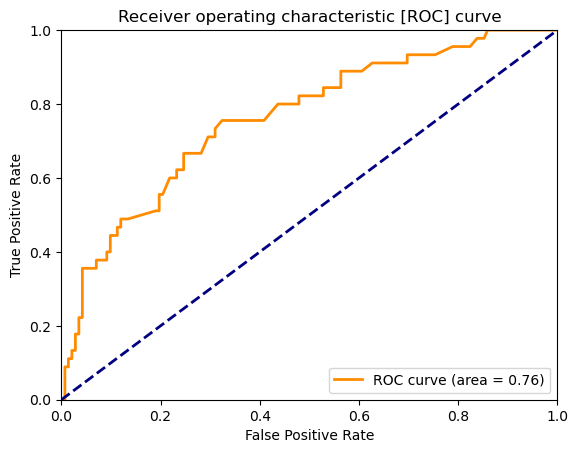

In [76]:
#Get fpr and tpr
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_probs)

#Calculate area under the curve
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic [ROC] curve')
plt.legend(loc = "lower right")
plt.show()

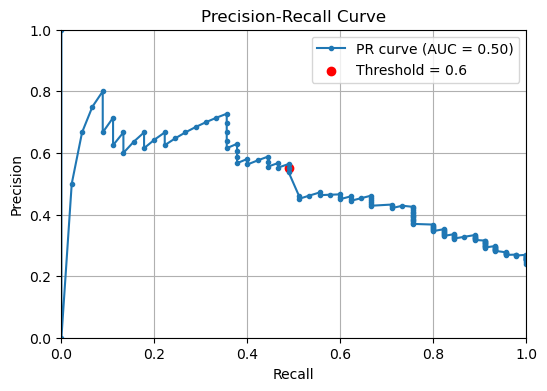

In [77]:
#Get precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_test_probs)

#Get the area under the curve
auc_score = auc(recall, precision)

#Get precision and recall at threshold = 0.6
prec = precision_score(y_test, y_test_pred_adj)
rec = recall_score(y_test, y_test_pred_adj)

#Plot the 
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.', label=f'PR curve (AUC = {auc(recall, precision):.2f})')
plt.scatter(rec, prec, color='red', label=f'Threshold = 0.6')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

Interpretation:
- The Precision-Recall curve shows low precision and high recall which means the model is more lenient in positive predictions, resulting in more false positives but also capturing most of the true positives.
- Changed threshold to 0.6 and reran; results below:
- Accuracy = 0.7807 > min. baseline result 0.6895.
- ROC curve = 0.76 > min. baseline result 0.5690.
- Therefore, model performs better than baseline.

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

The model can be used to predict whether someone is likely to donate blood.

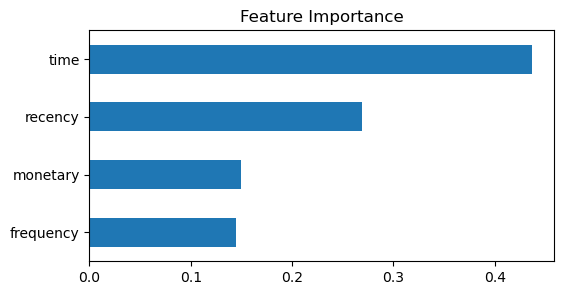

In [104]:
# Create a DataFrame of features and their importances
importances = pd.Series(model.feature_importances_, index=X_train.columns)
plt.figure(figsize = (6,3))
importances.sort_values(ascending=False).plot(kind='barh')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

>



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



